In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd

In [56]:
load_train_data='../input/fruitcnn/traicay'

In [57]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10)

In [58]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical',
    subset = 'training'
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical',
    subset = 'validation'
    )

Found 4755 images belonging to 10 classes.
Found 949 images belonging to 10 classes.


In [59]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'Apple Braeburn': 0, 'Banana Lady Finger': 1, 'Blueberry': 2, 'Corn': 3, 'Fig': 4, 'Ginger Root': 5, 'Lychee': 6, 'Onion Red Peeled': 7, 'Strawberry': 8, 'Watermelon': 9}
{'Apple Braeburn': 0, 'Banana Lady Finger': 1, 'Blueberry': 2, 'Corn': 3, 'Fig': 4, 'Ginger Root': 5, 'Lychee': 6, 'Onion Red Peeled': 7, 'Strawberry': 8, 'Watermelon': 9}


In [60]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(train_data,batch_size=100,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
48/48 [==============================] - 22s 454ms/step - loss: 10.6102 - accuracy: 0.7821 - val_loss: 0.0900 - val_accuracy: 0.9884
Epoch 2/50
48/48 [==============================] - 12s 255ms/step - loss: 2.4016 - accuracy: 0.9422 - val_loss: 0.0724 - val_accuracy: 0.9937
Epoch 3/50
48/48 [==============================] - 12s 257ms/step - loss: 0.2707 - accuracy: 0.9624 - val_loss: 0.0360 - val_accuracy: 0.9958
Epoch 4/50
48/48 [==============================] - 12s 247ms/step - loss: 0.4655 - accuracy: 0.9533 - val_loss: 0.1171 - val_accuracy: 0.9694
Epoch 5/50
48/48 [==============================] - 12s 256ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0213 - val_accuracy: 0.9937
Epoch 6/50
48/48 [==============================] - 13s 264ms/step - loss: 1.7783 - accuracy: 0.9554 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 7/50
48/48 [==============================] - 12s 252ms/step - loss: 0.0225 - accuracy: 0.9977 - val_loss: 0.0284 - val_accuracy: 0.987

In [71]:
score=model.evaluate(validation_set,verbose=0)
print('Sai số khi kiểm tra của mô hình là:',score[0])
print('Độ chính xác khi kiểm tra của mô hình là:',score[1])

Sai số khi kiểm tra của mô hình là: 0.2886275351047516
Độ chính xác khi kiểm tra của mô hình là: 0.9884088635444641


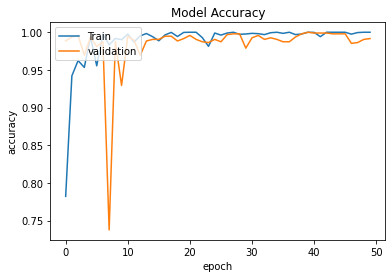

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

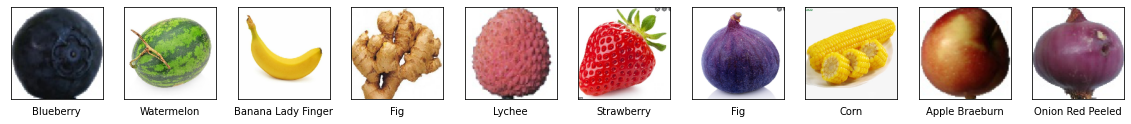

In [66]:
fruit={0:'Apple Braeburn',
       1:'Banana Lady Finger',
       2:'Blueberry',
       3:'Corn',
       4:'Fig',
       5:'Ginger Root',
       6:'Lychee',
       7:'Onion Red Peeled',
       8:'Strawberry',
       9:'Watermelon'}

import os
filenames=os.listdir("../input/fruittest/fruittest")
df=pd.DataFrame({'filename':filenames})
url='../input/fruittest/fruittest/'+df['filename']

plt.figure(figsize=(20,20))
for i in range(df.shape[0]):
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=load_img(url[i],target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.reshape(1,150,150,3)
  img=img/255.0
  img_pred = model.predict(img)
  plt.xlabel(fruit[np.argmax(img_pred)])
plt.show()

In [65]:
model.save('./fruitcnn.h5')